In [4]:
import random
import numpy as np
import pandas as pd

In [5]:
data = pd.read_excel("dataWithSomeReformatting.xlsx")
years = list(set(data["Year"]))
for year in years:
    data[year] = 0
    data[year][data["Year"] == year] = 1
    
pd.set_option("max_rows", len(data.index))
list(data.keys())

<ipython-input-5-fb251c785341>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-5-fb251c785341>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-5-fb251c785341>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-5-fb251c785341>:5: SettingWithCopyWarning: 
A value is trying to be set o

['Unnamed: 0',
 'Article_title',
 'Article_link',
 'General_outcome',
 'General_outcome (1,0)',
 'Desc_general_outcome',
 'Daily_intake',
 'Descr_daily_intake',
 'Health_outcome',
 'Descr_health_outcome',
 'Environmental_outcome',
 'Descr_environmental_outcome',
 'Fund_source',
 'Fund_Source',
 'University',
 'Private',
 'Private & Public',
 'Private & University',
 'Public',
 'Public & International Org',
 'Public & University',
 'University & International Org',
 'International Org',
 'Research Institution',
 'Not Available',
 'Institution',
 'Author_affiliation',
 'Loc_authors',
 'Loc_experiment',
 'Year',
 'Journal',
 'Loc_journal',
 'Loc_editor_journal',
 'Current Impact_Factor',
 'Impact_F_Publishing_Year',
 'Num_Citations',
 'International',
 'Research',
 'NEW ZEALAND',
 'SWITZERLAND',
 'NETHERLANDS',
 'BELGIUM',
 'SOUTH AFRICA',
 'SLOVAK REPUBLIC',
 'GREECE',
 'UKRAINE',
 'GERMANY',
 'FRANCE',
 'CAMEROON',
 'FINLAND',
 'BRAZIL',
 'CHINA',
 'POLAND',
 'ECUADOR',
 'CROATIA',
 'CA

In [6]:
import random
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
length = 1000
cols = ["Q", "X", "Y", "Z"]
mu = 0
sigma = 5


import pingouin
lst_dct = {col:[] for col in cols }
for i in range(length):
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(5 * lst_dct["Q"][-1] + 10 + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -3 + 20 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(5 * lst_dct["X"][-1] + 10 * lst_dct["Y"][-1] +  np.random.normal(mu, 3 * sigma))

df = pd.DataFrame(lst_dct)
keys = ["X",
        "Y",
        "Z",
        "Q"]
dag_keys = keys 
df

,Q,X,Y,Z
0,39.746461,200.407850,-89.585003,115.270987
1,52.444594,266.285272,-135.836020,-19.734991
2,49.751016,254.967613,-113.640124,127.015955
3,35.340895,186.380817,-86.428046,85.793244
4,46.016951,243.143287,-127.827426,-53.511249
...,...,...,...,...
995,50.381888,264.586290,-124.338910,73.641033
996,48.659916,262.951119,-123.403259,111.864483
997,53.984842,272.990182,-138.004793,-8.742451
998,50.571847,261.850646,-139.609173,-92.640203


In [2]:
import pingouin

undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph           

{'Q': ['X', 'Y', 'Z'],
 'X': ['Q', 'Y', 'Z'],
 'Y': ['Q', 'X', 'Z'],
 'Z': ['Q', 'X', 'Y']}

In [3]:
import copy
import pingouin
p_val = .001
def build_skeleton(df, undirected_graph):    
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        c_used = copy.copy(controls_used)
        for c_var in control_vars:
            if y not in undirected_graph[x]:
                break
            c_used.append(c_var)
            test = df.partial_corr(x = x, y = y, covar=c_used,
                                  method = "pearson")
            if test["p-val"].values[0] > p_val: 

                undirected_graph[x].remove(y)
                #breakout of the for 
                break
            else:
                remaining_controls = copy.copy(control_vars)
                remaining_controls.remove(c_var)
                check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
    d_sep = {}
    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            d_sep[(x,y)] = []

            if x != y:
            # first check for correlation with no controls
                print(x, y)
                test = df.partial_corr(x = x, y = y, covar = None,method = "pearson") 
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
            # if correlated check for deseparation controlling for other variables
                else:
                ############## make recursive function #############

                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = build_skeleton(df, undirected_graph)                                   
undirected_graph

Q X
Q Y
Q Z
X Q
X Y
X Z
Y Q
Y X
Y Z
Z Q
Z X
Z Y


{'Q': ['X', 'Y'], 'X': ['Q', 'Z'], 'Y': ['Q', 'Z'], 'Z': ['X', 'Y']}

In [4]:
def check_colliders(df, undirected_graph):
    for x in undirected_graph.keys():
        # use copy.copy() to make a copy of the list
        # since we will likely remove links from the list
        ys = copy.copy(undirected_graph[x])
        for y1 in ys:
            remaining_ys = copy.copy(ys)
            remaining_ys.remove(y1)
            for y2 in remaining_ys:
                test = df.partial_corr(x = y1, y = y2, covar=[],
                                  method = "pearson")
                # mark previous significance as True or False for reference
                prev_sig = False if test["p-val"].values[0] > p_val else True
                
                test = df.partial_corr(x = y1, y = y2, covar=[x],
                                  method = "pearson")

                

check_colliders(df, undirected_graph)

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    
    # generate partial correlation matrix to draw values from
    # for graph edges
    pcorr_matrix = df.pcorr()
    graph = nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key.replace(" ","\n"), key2[0].replace(" ","\n"))
                edges.append(edge)
                # edge label is partial correlation between
                # key and key2
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2],2))

    # edge format: ("i", "j") --> from node i to node j
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, 
                     node_size = 1000,
                     with_labels=True,  arrows=False,
                     font_size = 20, alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
    plt.axis("off")
    plt.savefig("g1.png", format="PNG")
    # tell matplotlib you're done with the plot: https://stackoverflow.com/questions/741877/how-do-i-tell-matplotlib-that-i-am-done-with-a-plot
    plt.show()


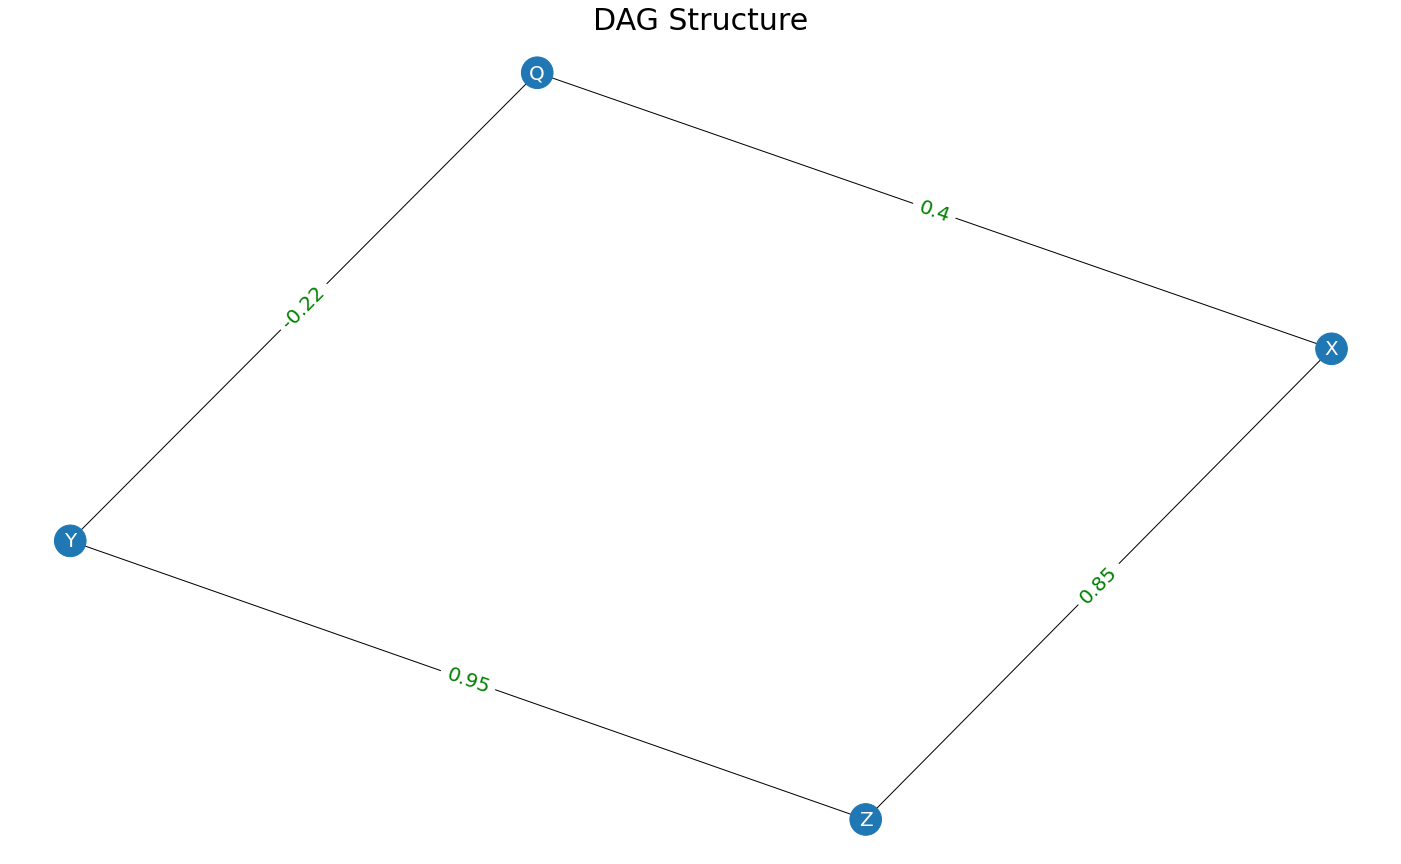

In [6]:
graph_DAG(undirected_graph, df, title = "DAG Structure")

In [7]:
from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(keys) - 1


model = c.estimate(return_type = "dag", significance_level = 0.05, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()
pcorr = df.pcorr()
weights = {}
for edge in edges:
    print(edge, ":",pcorr[edge[0]].loc[edge[1]])

Working for n conditional variables: 3: 100%|████████████████████████████████████████████| 3/3 [00:00<00:00,  5.40it/s]C:\ProgramData\Anaconda3\lib\site-packages\pgmpy\estimators\PC.py:369: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed conditional variables. Exiting")
Working for n conditional variables: 3: 100%|████████████████████████████████████████████| 3/3 [00:00<00:00,  5.34it/s]

('Y', 'Z') : 0.9522473677292141
('Y', 'X') : -0.8019840888802723
('X', 'Z') : 0.8466022116398735
('Q', 'X') : 0.3973444430210116
('Q', 'Y') : -0.21672443128140434


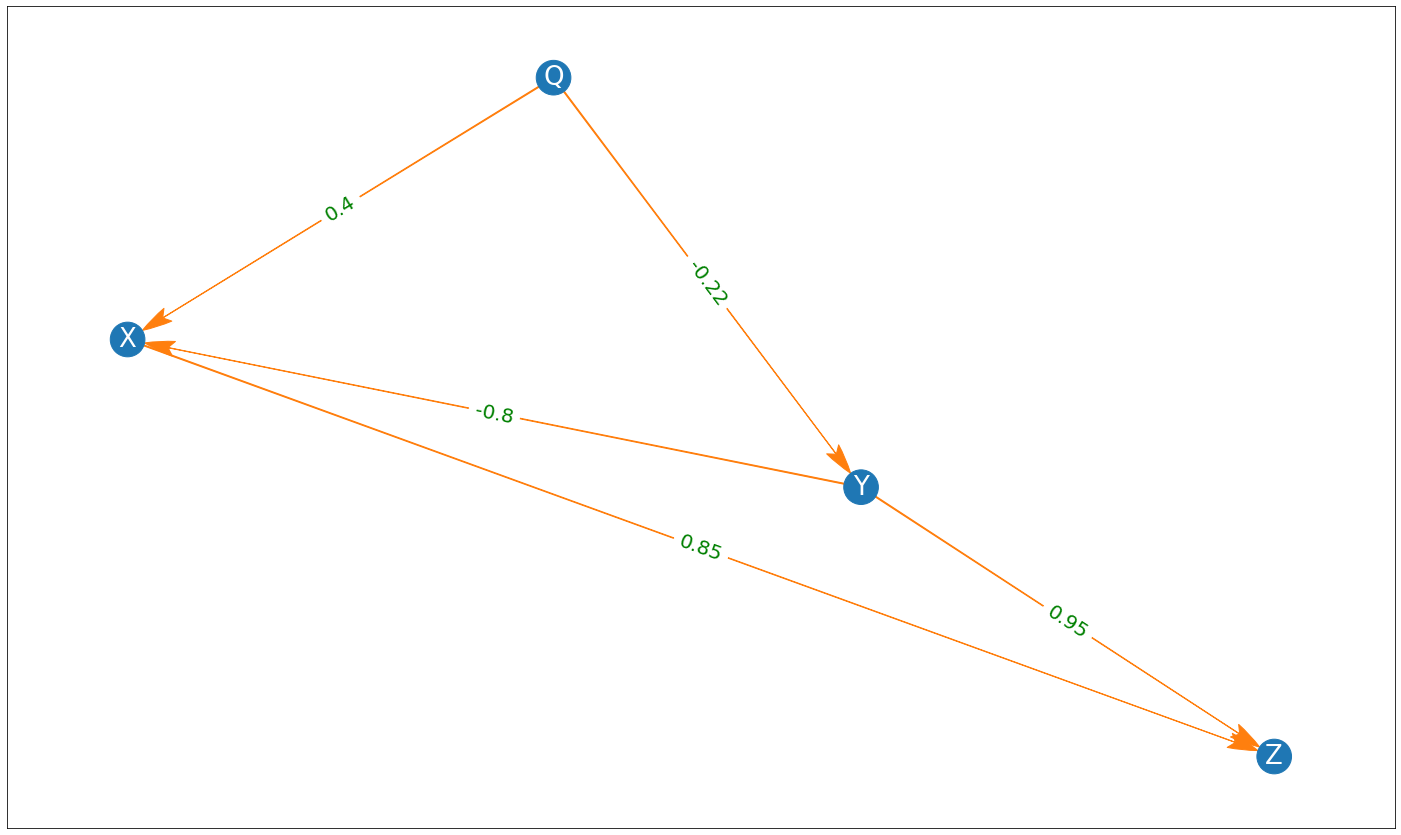

In [8]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title = ""):
    pcorr = df.pcorr()
    graph = nx.DiGraph()
    edge_labels = {}
    for edge in edges:
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
        
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "white",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)

graph_DAG(edges, df)
    

In [9]:
def graph_stats(df, edges):
    statistics = {}
    for (node1, node2) in edges:
        covar = [node for node in df.keys() if node not in [node1, node2]]
        statistics[(node1, node2)] = df.partial_corr(x = node1, y = node2, covar=covar,
                        method = "pearson")
        statistics[(node1, node1)] = statistics[(node1, node2)]

        print(node1, node2, statistics[(node1, node2)], sep = "\n")
graph_stats(df, edges)

Y
Z
            n         r         CI95%  p-val
pearson  1000  0.952247  [0.95, 0.96]    0.0
Y
X
            n         r           CI95%          p-val
pearson  1000 -0.801984  [-0.82, -0.78]  4.158270e-225
X
Z
            n         r         CI95%          p-val
pearson  1000  0.846602  [0.83, 0.86]  4.641839e-275
Q
X
            n         r         CI95%         p-val
pearson  1000  0.397344  [0.34, 0.45]  4.333281e-39
Q
Y
            n         r           CI95%         p-val
pearson  1000 -0.216724  [-0.28, -0.16]  4.503636e-12
